# References
- https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart
- https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
- https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("students.csv")

In [3]:
df

,lastname,firstname,boss,division
0,Pastick,Neal (Contractor) J,Danny (Contractor) Howard,Science Division
1,Postma,Kory (Contractor),Jayson (Contractor) Holter,Satellite Ground System Division
2,Bunde,Brett (Contractor),Danny (Contractor) Howard,Science Division
3,Danielson,Patrick (Contractor),Danny (Contractor) Howard,Science Division
4,Butzer,Tony (Contractor),Cory (Contractor) Van Batavia,Satellite Ground System Division
5,Dahal,Devendra (Contractor),Danny (Contractor) Howard,Science Division
6,Wylie,Bruce K,Kristi Sayler,Integrated Science & Applications Branch
7,Rover,Jennifer,Peter Doucette,Integrated Science & Applications Branch
8,Zhou,Qiang (Contractor),Ramesh (Contractor) Singh,Science Division
9,Rigge,Matthew B,Kristi Sayler,Integrated Science & Applications Branch


# Groupby division

In [4]:
students=df

In [5]:
by_division = students.groupby('division').count()

In [6]:
by_division

,lastname,firstname,boss
division,,,
Integrated Science & Applications Branch,4,4,4
Satellite Ground System Division,2,2,2
Science Division,7,7,7


In [7]:
type(by_division)

pandas.core.frame.DataFrame

In [8]:
howard = students[students['boss'].str.contains('Howard')]

# Who works for Danny Howard - I knew a Steve Howard

In [9]:
howard

,lastname,firstname,boss,division
0,Pastick,Neal (Contractor) J,Danny (Contractor) Howard,Science Division
2,Bunde,Brett (Contractor),Danny (Contractor) Howard,Science Division
3,Danielson,Patrick (Contractor),Danny (Contractor) Howard,Science Division
5,Dahal,Devendra (Contractor),Danny (Contractor) Howard,Science Division


In [10]:
science_folks = students[students['division'].str.contains('Science')]

In [11]:
science_folks

,lastname,firstname,boss,division
0,Pastick,Neal (Contractor) J,Danny (Contractor) Howard,Science Division
2,Bunde,Brett (Contractor),Danny (Contractor) Howard,Science Division
3,Danielson,Patrick (Contractor),Danny (Contractor) Howard,Science Division
5,Dahal,Devendra (Contractor),Danny (Contractor) Howard,Science Division
6,Wylie,Bruce K,Kristi Sayler,Integrated Science & Applications Branch
7,Rover,Jennifer,Peter Doucette,Integrated Science & Applications Branch
8,Zhou,Qiang (Contractor),Ramesh (Contractor) Singh,Science Division
9,Rigge,Matthew B,Kristi Sayler,Integrated Science & Applications Branch
10,Boyte,Stephen,Kristi Sayler,Integrated Science & Applications Branch
11,Smith,Kelcy (Contractor) L,Ryan (Contractor) Reker,Science Division


In [12]:
len(science_folks)

11

In [13]:
by_division

,lastname,firstname,boss
division,,,
Integrated Science & Applications Branch,4,4,4
Satellite Ground System Division,2,2,2
Science Division,7,7,7


# Plot the classes of students using boss

In [14]:
boss_by_division = by_division['boss']

In [15]:
boss_by_division

division
 Integrated Science & Applications Branch    4
 Satellite Ground System Division            2
 Science Division                            7
Name: boss, dtype: int64

In [16]:
boss_by_division.plot.pie(autopct='%1.1f%%', shadow = True)

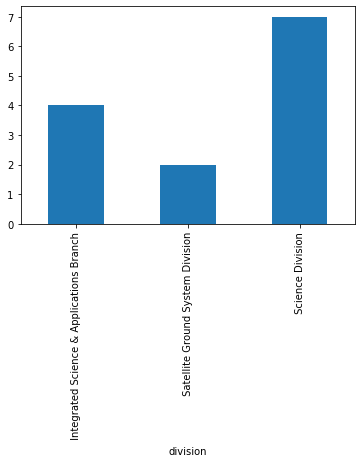

In [17]:
boss_by_division.plot.bar()

# Improve the colors

In [18]:
from itertools import islice
from itertools import cycle
my_colors =  list(islice(cycle(['b', 'r', 'g', 'y', 'k']),None,len(boss_by_division)))

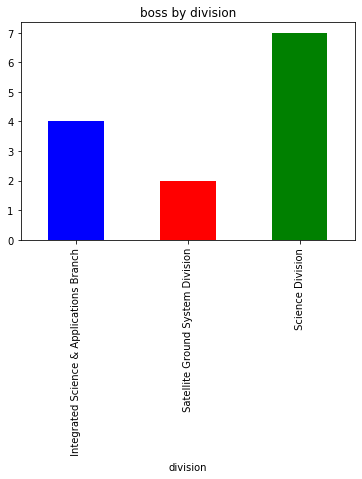

In [19]:
boss_by_division.plot(title='boss by division', kind='bar', stacked=True, color=my_colors)

In [20]:
sayler = students[students['boss'].str.contains('Sayler')]

In [21]:
sayler

,lastname,firstname,boss,division
6,Wylie,Bruce K,Kristi Sayler,Integrated Science & Applications Branch
9,Rigge,Matthew B,Kristi Sayler,Integrated Science & Applications Branch
10,Boyte,Stephen,Kristi Sayler,Integrated Science & Applications Branch


In [22]:
print(students['lastname'])

0       Pastick
1        Postma
2         Bunde
3     Danielson
4        Butzer
5         Dahal
6         Wylie
7         Rover
8          Zhou
9         Rigge
10        Boyte
11        Smith
12      Anthony
Name: lastname, dtype: object


In [23]:
lastname = students['lastname']
lastname

0       Pastick
1        Postma
2         Bunde
3     Danielson
4        Butzer
5         Dahal
6         Wylie
7         Rover
8          Zhou
9         Rigge
10        Boyte
11        Smith
12      Anthony
Name: lastname, dtype: object

In [24]:
lastname_no_indices = lastname.to_string(index=False)

In [25]:
print(lastname_no_indices)

   Pastick
    Postma
     Bunde
 Danielson
    Butzer
     Dahal
     Wylie
     Rover
      Zhou
     Rigge
     Boyte
     Smith
   Anthony


In [26]:
type(lastname_no_indices)

str

In [29]:
for i in lastname_no_indices.split('\n'):
    #print(i)
    i = i.lower()
    i = i.strip()
    print(i)

pastick
postma
bunde
danielson
butzer
dahal
wylie
rover
zhou
rigge
boyte
smith
anthony
